In [1]:
from fastai.vision import *

In [2]:
PATH = Path("/home/turgutluk/data/breast_path/")

In [3]:
PATH.ls()

[PosixPath('/home/turgutluk/data/breast_path/labels'),
 PosixPath('/home/turgutluk/data/breast_path/Images'),
 PosixPath('/home/turgutluk/data/breast_path/test.txt'),
 PosixPath('/home/turgutluk/data/breast_path/images'),
 PosixPath('/home/turgutluk/data/breast_path/train.txt'),
 PosixPath('/home/turgutluk/data/breast_path/codes.txt'),
 PosixPath('/home/turgutluk/data/breast_path/Validation_Image')]

### files

In [4]:
files = get_files(PATH/"Images", recurse=True)

In [5]:
images = [o for o in files if "Seg" not in o.name]
labels = [o for o in files if "Seg" in o.name]

In [6]:
images[:3], labels[:3]

([PosixPath('/home/turgutluk/data/breast_path/Images/DCIS_020282_2.tif'),
  PosixPath('/home/turgutluk/data/breast_path/Images/DCIS_020177_2.tif'),
  PosixPath('/home/turgutluk/data/breast_path/Images/DCIS_020392_2.tif')],
 [PosixPath('/home/turgutluk/data/breast_path/Images/DCIS_020095_2_FinalSeg.tif'),
  PosixPath('/home/turgutluk/data/breast_path/Images/DCIS_020383_2_FinalSeg.tif'),
  PosixPath('/home/turgutluk/data/breast_path/Images/DCIS_020490_2_FinalSeg.tif')])

In [7]:
len(images), len(labels)

(30, 30)

In [8]:
validation_files = get_files(PATH/"Validation_Image", recurse=True)

In [9]:
validation_images = [o for o in validation_files if "Seg" not in o.name]
validation_labels = [o for o in validation_files if "Seg" in o.name]
validation_images[:3], validation_labels[:3]

([PosixPath('/home/turgutluk/data/breast_path/Validation_Image/DCIS_020108_1.tif'),
  PosixPath('/home/turgutluk/data/breast_path/Validation_Image/DCIS_020157_1.tif'),
  PosixPath('/home/turgutluk/data/breast_path/Validation_Image/DCIS_020034_1.tif')],
 [PosixPath('/home/turgutluk/data/breast_path/Validation_Image/DCIS_020098_1_FinalSeg.tif'),
  PosixPath('/home/turgutluk/data/breast_path/Validation_Image/DCIS_020150_1_FinalSeg.tif'),
  PosixPath('/home/turgutluk/data/breast_path/Validation_Image/DCIS_020036_1_FinalSeg.tif')])

In [10]:
len(validation_images), len(validation_labels)

(15, 15)

In [11]:
def _sort_by_key(l): return sorted(l, key=lambda o: int(o.name.split("_")[1]))

In [12]:
images = _sort_by_key(images)
labels = _sort_by_key(labels)
validation_images = _sort_by_key(validation_images)
validation_labels = _sort_by_key(validation_labels)

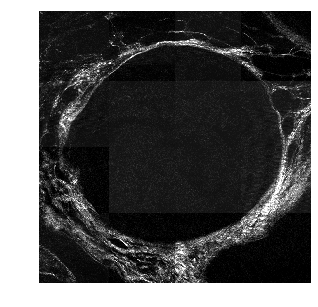

In [13]:
img = open_image(images[1]); img.show(figsize=(5,5))

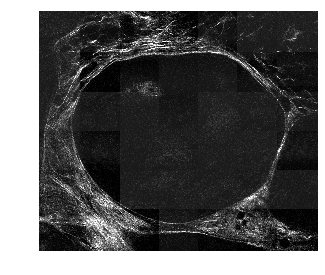

In [14]:
img = open_image(validation_images[2]); img.show(figsize=(5,5))

In [15]:
images[:3], validation_images[:3]

([PosixPath('/home/turgutluk/data/breast_path/Images/DCIS_020036_2.tif'),
  PosixPath('/home/turgutluk/data/breast_path/Images/DCIS_020052_2.tif'),
  PosixPath('/home/turgutluk/data/breast_path/Images/DCIS_020074_2.tif')],
 [PosixPath('/home/turgutluk/data/breast_path/Validation_Image/DCIS_020034_1.tif'),
  PosixPath('/home/turgutluk/data/breast_path/Validation_Image/DCIS_020036_1.tif'),
  PosixPath('/home/turgutluk/data/breast_path/Validation_Image/DCIS_020052_1.tif')])

In [16]:
images += validation_images
labels += validation_labels

In [17]:
len(images), len(labels)

(45, 45)

### images

In [18]:
image_id2fn = defaultdict(list)
for o in images:
    image_id = o.stem
    image_id2fn[image_id].append(o)

In [19]:
# ! version of image per patch ?
assert len(image_id2fn) == len(images)

In [20]:
for k, v in image_id2fn.items(): pass

image id: DCIS_020215_1


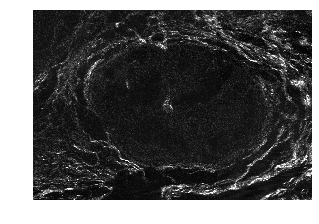

In [21]:
print(f"image id: {k}"); img = open_image(v[0]); img.show(figsize=(5,5))

In [22]:
# this is actually a single channel image!
img.data

tensor([[[0.0588, 0.0588, 0.0588,  ..., 0.0588, 0.2078, 0.2667],
         [0.0588, 0.0745, 0.0863,  ..., 0.1333, 0.0863, 0.0863],
         [0.0745, 0.0588, 0.0863,  ..., 0.2235, 0.3412, 0.2510],
         ...,
         [0.2824, 0.1922, 0.3569,  ..., 0.4039, 0.1490, 0.1647],
         [0.1333, 0.2824, 0.2980,  ..., 0.2980, 0.1020, 0.1020],
         [0.1922, 0.0863, 0.1490,  ..., 0.2510, 0.1176, 0.1647]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0588, 0.2078, 0.2667],
         [0.0588, 0.0745, 0.0863,  ..., 0.1333, 0.0863, 0.0863],
         [0.0745, 0.0588, 0.0863,  ..., 0.2235, 0.3412, 0.2510],
         ...,
         [0.2824, 0.1922, 0.3569,  ..., 0.4039, 0.1490, 0.1647],
         [0.1333, 0.2824, 0.2980,  ..., 0.2980, 0.1020, 0.1020],
         [0.1922, 0.0863, 0.1490,  ..., 0.2510, 0.1176, 0.1647]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0588, 0.2078, 0.2667],
         [0.0588, 0.0745, 0.0863,  ..., 0.1333, 0.0863, 0.0863],
         [0.0745, 0.0588, 0.0863,  ..., 0.2235, 0.3412, 0.

In [23]:
# check if data is duplicate over 3 channels
assert torch.equal(img.data[0], img.data[1]) == torch.equal(img.data[0], img.data[2])

### labels

In [24]:
label_id2fn = defaultdict(list)
for o in labels:
    label_id = "_".join(o.stem.split("_")[:3])
    label_id2fn[label_id].append(o)

In [25]:
assert len(label_id2fn) == len(labels)

mask id: DCIS_020215_1


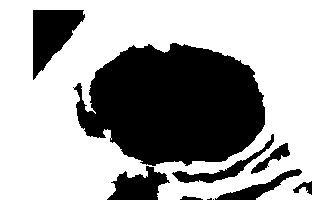

In [26]:
# masks are 0-255
print(f"mask id: {k}"); mask = open_mask(label_id2fn[k][0], div=True);
mask.show(figsize=(5,5), alpha=1., cmap='gray')

In [27]:
assert torch.equal(mask.data.unique(), tensor([0,1]))

In [28]:
for k1,k2 in zip(label_id2fn.keys(),image_id2fn.keys()):
    try: assert k1 == k2
    except: raise Exception(f"image key: {k1}, label key: {k2}")

In [29]:
# shutil.move('/home/turgutluk/data/breast_path/Images/DCIS_020489_2FinalSeg.tif',
#            '/home/turgutluk/data/breast_path/Images/DCIS_020489_2_FinalSeg.tif')

### save images and labels

In [30]:
shutil.rmtree(PATH/'images'); shutil.rmtree(PATH/'labels')

In [31]:
os.makedirs(PATH/'images', exist_ok=True)
os.makedirs(PATH/'labels', exist_ok=True)

In [32]:
# save images
for k,l in image_id2fn.items():
    save_fn = PATH/'images'/f'{k}.tif'
    img = open_image(l[0])
    img.save(save_fn)

In [33]:
# save labels
for k,l in label_id2fn.items():
    mask = open_mask(l[0], div=True)
    assert torch.equal(mask.data.unique(), tensor([0,1]))
    savefn = PATH/'labels'/f'{k}.tif'
    mask.save(savefn)
    mask = open_mask(savefn, div=False)
    assert torch.equal(mask.data.unique(), tensor([0,1]))

In [34]:
len(images), len(labels)

(45, 45)

### show

In [35]:
imagefiles = get_files(PATH/'images')
maskfiles = get_files(PATH/'labels')

In [36]:
imagefiles[0], maskfiles[0]

(PosixPath('/home/turgutluk/data/breast_path/images/DCIS_020282_2.tif'),
 PosixPath('/home/turgutluk/data/breast_path/labels/DCIS_020282_2.tif'))

In [37]:
img = open_image(imagefiles[0])
mask = open_mask(maskfiles[0])

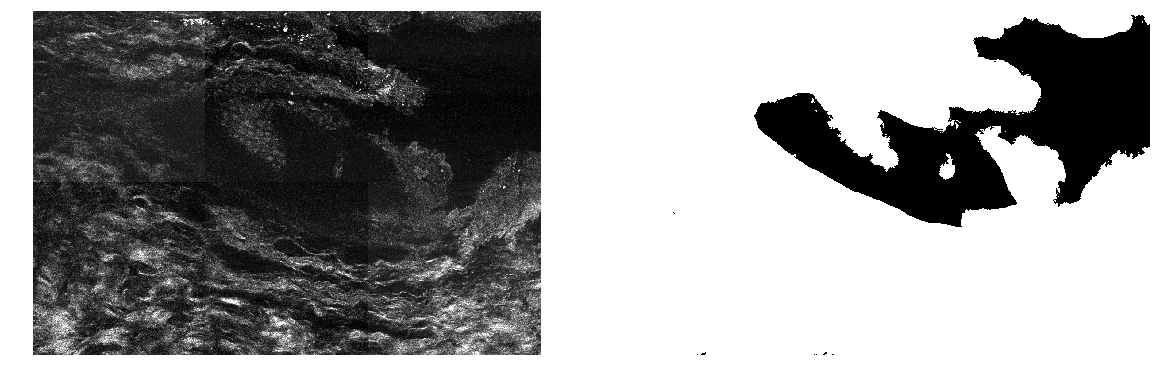

In [38]:
fig, axes = plt.subplots(1,2, figsize=(20,20))
img.show(ax=axes[0])
mask.show(ax=axes[1], cmap='gray', alpha=1.0)

In [39]:
mask.data

tensor([[[1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 1, 1, 1],
         ...,
         [1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 1, 1, 1]]])

### statistics

In [40]:
il = ImageList.from_folder(PATH/'images')
ll = SegmentationLabelList.from_folder(PATH/'labels')

In [41]:
il

ImageList (45 items)
Image (3, 779, 1148),Image (3, 1148, 1517),Image (3, 1517, 1517),Image (3, 1148, 1148),Image (3, 779, 1148)
Path: /home/turgutluk/data/breast_path/images

In [42]:
ll

SegmentationLabelList (45 items)
ImageSegment (1, 779, 1148),ImageSegment (1, 1148, 1517),ImageSegment (1, 1517, 1517),ImageSegment (1, 1148, 1148),ImageSegment (1, 779, 1148)
Path: /home/turgutluk/data/breast_path/labels

In [43]:
image_sizes = [o.size for o in il]
label_sizes = [o.size for o in ll]

In [44]:
assert image_sizes == label_sizes

In [45]:
h,w = list(zip(*image_sizes))

In [46]:
counts = defaultdict(int)
for hi, wi in zip(h,w):
    counts[(hi, wi)] += 1

In [47]:
counts

defaultdict(int,
            {(779, 1148): 3,
             (1148, 1517): 1,
             (1517, 1517): 3,
             (1148, 1148): 13,
             (1886, 1886): 1,
             (1517, 1148): 5,
             (1886, 1148): 1,
             (1886, 2255): 1,
             (2624, 2255): 2,
             (1148, 1886): 2,
             (2624, 2624): 1,
             (1517, 1886): 3,
             (1148, 779): 3,
             (2255, 1517): 2,
             (1517, 2255): 1,
             (2255, 2255): 1,
             (2255, 2624): 1,
             (1517, 779): 1})

In [69]:
il.items[8]; ll.items[8]

PosixPath('/home/turgutluk/data/breast_path/labels/DCIS_020187_1.tif')

In [86]:
mask = open_mask(label_id2fn[ll.items[24].stem][0], div=True)

In [87]:
# 8,23,31

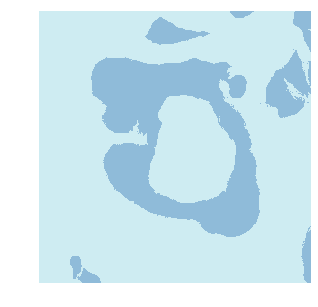

In [88]:
mask.show(figsize=(5,5))

### add codes and test

In [89]:
images = (PATH/'images').ls()

In [94]:
test_image_ids = {o.stem for o in validation_images}

In [97]:
test_images = [o for o in images if o.stem in test_image_ids]

In [100]:
train_images = [o for o in images if o not in test_images]

In [101]:
len(test_images),len(train_images)

(15, 30)

In [115]:
# create codes.txt, train.txt, test.txt
with open(PATH/'codes.txt', 'w') as f: f.write("Cell_Interior\nCell_Wall")
with open(PATH/'train.txt', 'w') as f: f.write("\n".join([o.name for o in train_images]))
with open(PATH/'test.txt', 'w') as f: f.write("\n".join([o.name for o in test_images]))

In [116]:
PATH.ls()

[PosixPath('/home/turgutluk/data/breast_path/labels'),
 PosixPath('/home/turgutluk/data/breast_path/Images'),
 PosixPath('/home/turgutluk/data/breast_path/test.txt'),
 PosixPath('/home/turgutluk/data/breast_path/images'),
 PosixPath('/home/turgutluk/data/breast_path/train.txt'),
 PosixPath('/home/turgutluk/data/breast_path/codes.txt'),
 PosixPath('/home/turgutluk/data/breast_path/Validation_Image')]

In [125]:
with open(PATH/'train.txt') as f:
    train_txt = f.read()
    assert len(train_txt.split("\n")) == len(train_images)

with open(PATH/'test.txt') as f:
    test_txt = f.read()
    assert len(test_txt.split("\n")) == len(test_images)

### fin